In [1]:
import pandas as pd
import numpy as np
import os

import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.core import Dense

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
base_model=ResNet50(weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(20,activation='softmax')(x) 

C:\Users\salee\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
model=Model(inputs=base_model.input,outputs=preds)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [5]:
for layer in model.layers:
    layer.trainable=True
        
for l in model.layers:
    print(l.name, l.trainable)

input_1 True
conv1_pad True
conv1 True
bn_conv1 True
activation_1 True
pool1_pad True
max_pooling2d_1 True
res2a_branch2a True
bn2a_branch2a True
activation_2 True
res2a_branch2b True
bn2a_branch2b True
activation_3 True
res2a_branch2c True
res2a_branch1 True
bn2a_branch2c True
bn2a_branch1 True
add_1 True
activation_4 True
res2b_branch2a True
bn2b_branch2a True
activation_5 True
res2b_branch2b True
bn2b_branch2b True
activation_6 True
res2b_branch2c True
bn2b_branch2c True
add_2 True
activation_7 True
res2c_branch2a True
bn2c_branch2a True
activation_8 True
res2c_branch2b True
bn2c_branch2b True
activation_9 True
res2c_branch2c True
bn2c_branch2c True
add_3 True
activation_10 True
res3a_branch2a True
bn3a_branch2a True
activation_11 True
res3a_branch2b True
bn3a_branch2b True
activation_12 True
res3a_branch2c True
res3a_branch1 True
bn3a_branch2c True
bn3a_branch1 True
add_4 True
activation_13 True
res3b_branch2a True
bn3b_branch2a True
activation_14 True
res3b_branch2b True
bn3b_bran

In [8]:
image_generator = ImageDataGenerator(validation_split=0.3)    

train_dataset = image_generator.flow_from_directory(batch_size=128,
                                                 directory="F:/FYP/Data/PFDIC-20 O",
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 target_size=(128,128), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=128,
                                                 directory="F:/FYP/Data/PFDIC-20 O",
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 target_size=(280, 280), 
                                                 subset="validation",
                                                 class_mode='categorical')


Found 5209 images belonging to 20 classes.
Found 2217 images belonging to 20 classes.


In [ ]:
optimizer1 = keras.optimizers.Adam(lr=0.001, amsgrad=True)

model.compile(optimizer=optimizer1,loss='categorical_crossentropy',metrics=['accuracy'])


trainStep_size_train=train_dataset.n//train_dataset.batch_size
valStep_size_train=validation_dataset.n//validation_dataset.batch_size

history=model.fit_generator(generator=train_dataset,
                             validation_data=validation_dataset,
                             epochs=100,verbose=1, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100


C:\Users\salee\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [8]:
pclasses = ['P-Biryani', 'P-Bun Kabab', 'P-Chaat', 'P-Chicken Tikka', 'P-Daal', 
           'P-Fruit Chart', 'P-Gajar ka halwa', 'P-Gulab Jamun', 'P-Jalebi','Karhai',
            'P-Keema', 'P-Kheer', 'P-Kofta', 'P-Kulfa', 'P-Nihari', 
            'P-Palak', 'P-Roti', 'P-Samosas', 'P-Seekh kebab', 'P-Shahi Tukray']
classes = ['Biryani', 'Bun Kabab', 'Chaat', 'Chicken Tikka', 'Daal', 
           'Fruit Chart', 'Gajar ka halwa', 'Gulab Jamun', 'Jalebi','Karhai',
            'Keema', 'Kheer', 'Kofta', 'Kulfa', 'Nihari', 
            'Palak', 'Roti', 'Samosas', 'Seekh kebab', 'Shahi Tukray']

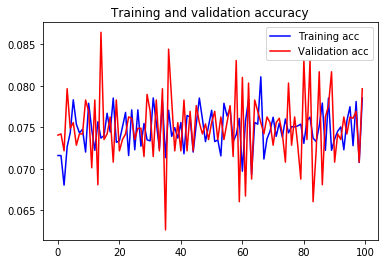

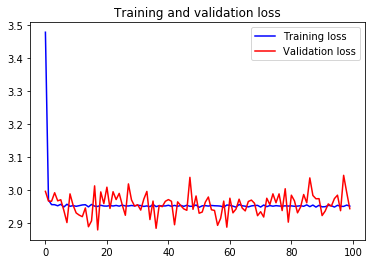

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [10]:
Y_pred = model.predict_generator(test_batches, steps=1633)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
cm=confusion_matrix(test_batches.classes, y_pred)
cm

Confusion Matrix


array([[  0,   0,   0,   0,   0,   0,   0,   0, 114,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  99,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  85,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  32,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  72,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  68,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 102,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 103,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 134,   0,   0,  

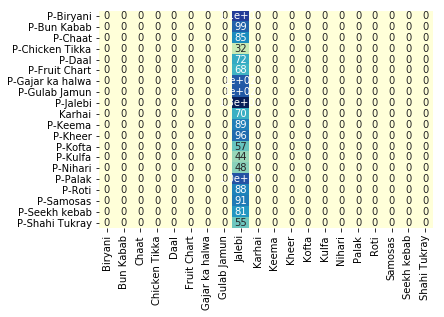

In [11]:
sns.heatmap(cm,xticklabels=classes, yticklabels=pclasses, annot=True,cbar=False,cmap="YlGnBu")

In [12]:
print('Classification Report')
print(classification_report(test_batches.classes, y_pred, target_names=classes))

Classification Report
                precision    recall  f1-score   support

       Biryani       0.00      0.00      0.00       114
     Bun Kabab       0.00      0.00      0.00        99
         Chaat       0.00      0.00      0.00        85
 Chicken Tikka       0.00      0.00      0.00        32
          Daal       0.00      0.00      0.00        72
   Fruit Chart       0.00      0.00      0.00        68
Gajar ka halwa       0.00      0.00      0.00       102
   Gulab Jamun       0.00      0.00      0.00       103
        Jalebi       0.08      1.00      0.15       134
        Karhai       0.00      0.00      0.00        70
         Keema       0.00      0.00      0.00        89
         Kheer       0.00      0.00      0.00        96
         Kofta       0.00      0.00      0.00        57
         Kulfa       0.00      0.00      0.00        44
        Nihari       0.00      0.00      0.00        48
         Palak       0.00      0.00      0.00       105
          Roti       0.00

C:\Users\Fyp-FoodParts\Anaconda3\envs\cuda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
scores = model.evaluate_generator(test_batches,len(test_batches)) #1514 testing images
print("Accuracy = ", scores[1])

Accuracy =  0.08205756545066833


In [14]:
print(scores)

[2.9810128211975098, 0.08205756545066833]
